# Task 1 - Dataset Summarization

#### Extraction, Reading, and Cleaning of the Dataset

In [5]:
# Unzip
from zipfile import ZipFile #import zip library
with ZipFile("../Task1/sleep-quality-dataset.zip", "r") as zip_data:
    zip_data.extractall("../Task1/csvFileExtractionZone") #extract all data within zip into csvFileExtractoinZone

# Read
import numpy as np # Numpy For Any Mathematics
import pandas as pd # Pandas for Data Analysis

#Reading Data 
pd.set_option('display.max_columns', None)
SleepHealth_df = pd.read_csv('csvFileExtractionZone/Sleep_health_and_lifestyle_dataset.csv')
print(SleepHealth_df.shape)
print(SleepHealth_df) #Large Dataset so only printing first 5 and last 5 rows

#Cleaning Data
# - REMOVAL of Person ID
SleepHealth_df = SleepHealth_df.drop('Person ID'.strip(), axis = 1)
print(SleepHealth_df.columns)



(374, 13)
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1      

#### Summary Table 

In [6]:
# Initialize an empty dictionary
summary_data = {}

for i in SleepHealth_df.columns:
    if pd.to_numeric(SleepHealth_df[i], errors='coerce').notnull().all():
        column_info = {
            'Counts': SleepHealth_df[i].count(),
            'Mean': SleepHealth_df[i].mean(),
            'Standard Deviation': SleepHealth_df[i].std(),
            'min.': SleepHealth_df[i].min(),
            '25% Q': SleepHealth_df[i].quantile(0.25),
            '50% Q': SleepHealth_df[i].quantile(0.5),
            '75% Q': SleepHealth_df[i].quantile(0.75),
            'Max': SleepHealth_df[i].max()
        }
    else:
        column_info = {
            'Counts': SleepHealth_df[i].count(),
            'Mean': 'N/A',
            'Standard Deviation': 'N/A',
            'min.': 'N/A',
            '25% Q': 'N/A',
            '50% Q': 'N/A',
            '75% Q': 'N/A',
            'Max': 'N/A'
        }
    
    summary_data[i] = column_info

summaryTable_df = pd.DataFrame(summary_data)

# Print the summary table
print(summaryTable_df)


                   Gender         Age Occupation  Sleep Duration  \
Counts                374  374.000000        374      374.000000   
Mean                  N/A   42.184492        N/A        7.132086   
Standard Deviation    N/A    8.673133        N/A        0.795657   
min.                  N/A   27.000000        N/A        5.800000   
25% Q                 N/A   35.250000        N/A        6.400000   
50% Q                 N/A   43.000000        N/A        7.200000   
75% Q                 N/A   50.000000        N/A        7.800000   
Max                   N/A   59.000000        N/A        8.500000   

                    Quality of Sleep  Physical Activity Level  Stress Level  \
Counts                    374.000000               374.000000    374.000000   
Mean                        7.312834                59.171123      5.385027   
Standard Deviation          1.196956                20.830804      1.774526   
min.                        4.000000                30.000000      3.00

#### Missing Data & Data Types

In [7]:
print("The following columns have null values: ", end = '')
for i in SleepHealth_df.columns:
    if SleepHealth_df[i].isnull().any():
        print(i, end = '')
print()

print("The data type in the each column is as follows:\n" + str(SleepHealth_df.dtypes)[:str(SleepHealth_df.dtypes).rfind("\n")])

The following columns have null values: Sleep Disorder
The data type in the each column is as follows:
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object


#### Plots
Qualitative, Quantitative, and BMI

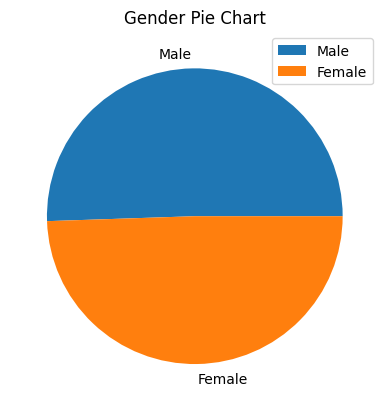

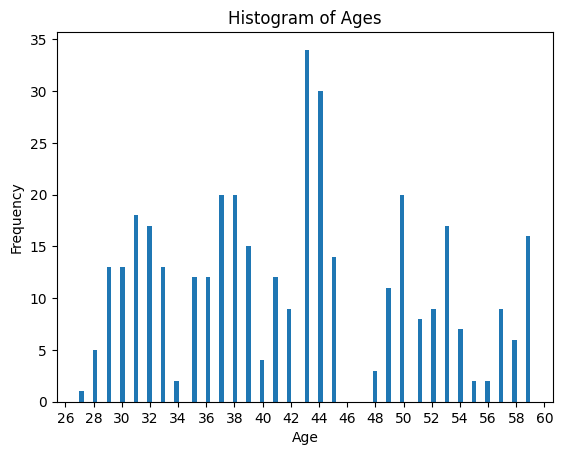

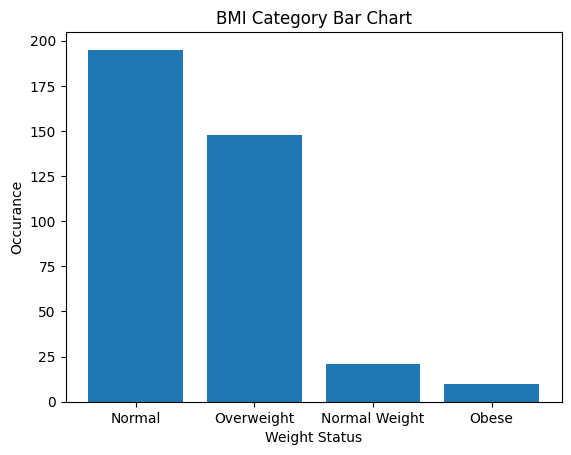

In [8]:
# Qualitative Data for Pie Chart: Gender

import matplotlib.pyplot as plt

pie_labels_gender = SleepHealth_df['Gender'].value_counts().index
plt.pie(SleepHealth_df['Gender'].value_counts(), labels = pie_labels_gender)

plt.title("Gender Pie Chart")
plt.legend()
plt.savefig("Saved Plots/gender_pie.png")
plt.show()

# Quaatitative data for Histogram: Age

plt.hist(SleepHealth_df["Age"], bins = 100)
plt.title("Histogram of Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(26, 61, 2))
plt.savefig("Saved Plots/age_hist.png")
plt.show()

# Bar Chart for BMI Data

plt.bar(SleepHealth_df["BMI Category"].value_counts().index, SleepHealth_df["BMI Category"].value_counts())
plt.title("BMI Category Bar Chart")
plt.xlabel('Weight Status')
plt.ylabel('Occurance')
plt.savefig("Saved Plots/BMI_bar.png")
plt.show()